In [10]:
from lib.signalProcessing import get_spectrogram, get_cepstro
from lib.networkFuntions import get_stream_for_selected_file, get_network_details, get_network_file_list
from lib.whaleIciDetection import get_mean_cepstrum, get_peak_to_valley_ratio
from obspy import UTCDateTime
from datetime import timedelta
import numpy as np

In [2]:
dfmseeds = get_network_file_list('MAHY', "MAHYx2","/Volumes/SDS")

In [3]:
row = dfmseeds.iloc[256]
file = row.filename
print(file)

/Volumes/SDS/2023/MAHY/MAHYx2/EDH.D/MAHY.MAHYx2.00.EDH.D.2023.257.mseed


In [4]:
from scipy.signal import butter, filtfilt

st = get_stream_for_selected_file(file)
st.trim(UTCDateTime(row.starttime), UTCDateTime(row.starttime + timedelta(hours=24)))
# Define a highpass filter
# def highpass_filter(data, cutoff, fs, order=4):
#     nyquist = 0.5 * fs
#     normal_cutoff = cutoff / nyquist
#     b, a = butter(order, normal_cutoff, btype='high', analog=False)
#     return filtfilt(b, a, data)

# # Apply the highpass filter to each trace in the stream
# for trace in st:
#     trace.data = highpass_filter(trace.data, cutoff=1.0, fs=trace.stats.sampling_rate)
st

24 Trace(s) in Stream:

MA.MAHY3.00.EDH | 2023-09-13T23:59:59.999000Z - 2023-09-14T00:09:59.999000Z | 240.0 Hz, 144001 samples
...
(22 other traces)
...
MA.MAHY3.00.EDH | 2023-09-14T22:59:59.999000Z - 2023-09-14T23:09:59.999000Z | 240.0 Hz, 144001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

<function matplotlib.pyplot.show(close=None, block=None)>

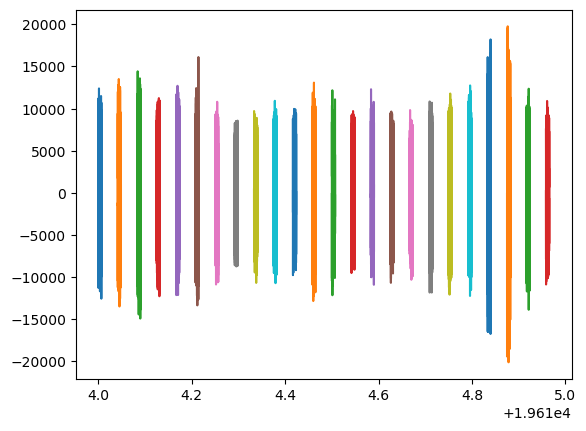

In [19]:
import matplotlib.pyplot as plt
plt.figure()
ax=plt.subplot()
for tr in st:
    # print(tr.stats)
    # print(tr.data.shape)
    # ax.plot(tr.data)
    ax.plot(tr.times("matplotlib"), tr.data)

plt.show

In [20]:
fftsize=512
noverlap = int(fftsize * 0.75)
integration = 5
bounds = [18,22]

all_frequencies = []
all_times = []
all_spectrograms = []

for trace in st:
    f, t, s = get_spectrogram(
        trace,
        fftsize,
        noverlap,
        integration,
        bounds
    )
    # Adjust time offset
    # if all_times:
    #     time_offset = all_times[-1][-1] - t[0]  # Calculate the offset as timedelta64
    #     t = t + time_offset  # Apply the offset to the current trace's times
    all_frequencies.append(f)
    all_times.append(t)
    all_spectrograms.append(s)

# Concatenate all results
f = all_frequencies[0]  # Frequencies are the same for all traces
t = np.concatenate(all_times)
s = np.concatenate(all_spectrograms, axis=1)

t,q,c = get_cepstro(t, f, s)

In [21]:
# fftsize=512
# noverlap = int(fftsize * 0.75)
# integration = 5
# bounds = [18,22]
# f, t, s = get_spectrogram(
#                 st[0],
#                 fftsize,
#                 noverlap,
#                 integration,
#                 bounds
#             )

# t,q,c = get_cepstro(t, f, s)

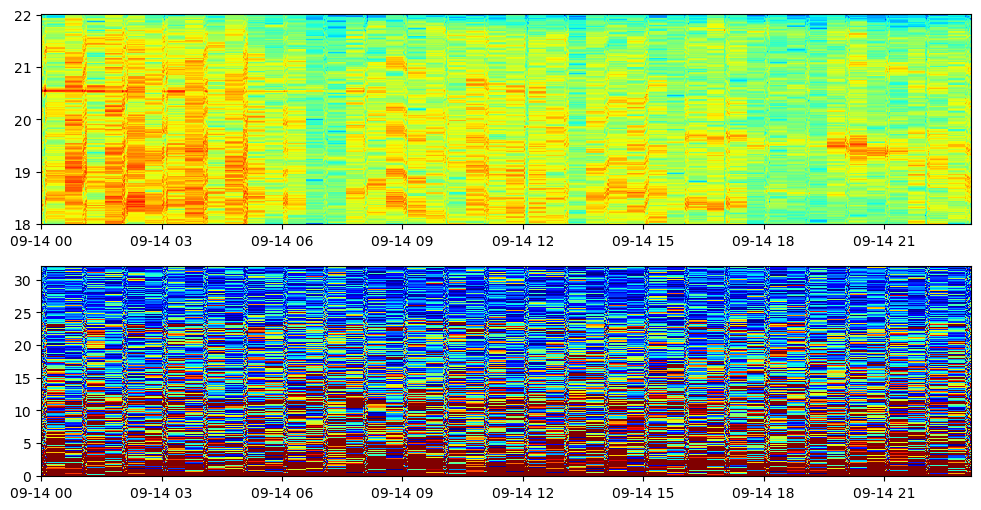

In [22]:
import numpy as np 
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.pcolormesh(t, f, np.log10(np.abs(s)),cmap="jet")

plt.subplot(212)
plt.pcolormesh(t, q, np.abs(c),cmap="jet", vmin=0, vmax=0.02)


plt.show()

In [12]:
(4 * 10 * 60)/512

4.6875